In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [69]:
df = pd.read_csv('Social_Network_Ads.csv',usecols=['Age','EstimatedSalary','Purchased'])

In [71]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [73]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [75]:
X = df.iloc[:,0:2]
Y = df.iloc[:,2]

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4504\2169456623.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


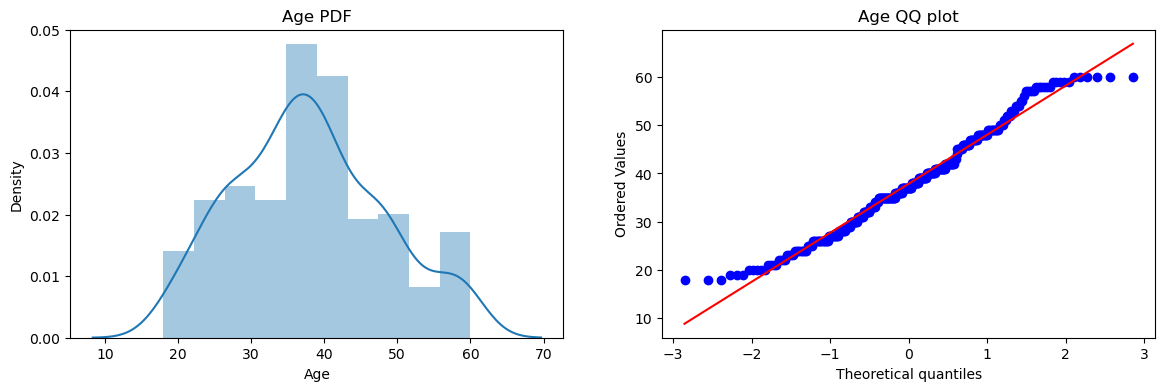

In [79]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4504\2482741247.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['EstimatedSalary'])


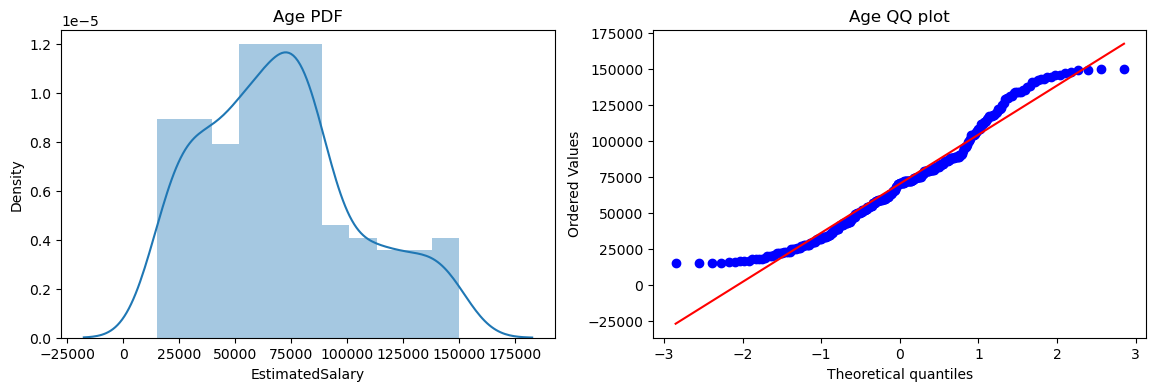

In [81]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['EstimatedSalary'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['EstimatedSalary'],dist='norm',plot=plt)
plt.title('Age QQ plot')

plt.show()

In [93]:
from sklearn.linear_model import LogisticRegression
def apply_transform(transform_type):
    X = df.iloc[:,0:2]
    Y = df.iloc[:,2]
    trf = ColumnTransformer([('trf', FunctionTransformer(transform_type), ['Age'])],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("accuracy",np.mean(cross_val_score(clf,X_trans,Y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Age'],dist='norm',plot=plt)
    plt.title('Age PDF')
    
    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist='norm',plot=plt)
    plt.title('After tranform')
    
    plt.show()


# def apply_transform(transform_type):
#     X = df.iloc[:, 0:2]  # First two columns
#     Y = df.iloc[:, 2]    # Target column

#     trf = ColumnTransformer(
#         [('trf', FunctionTransformer(transform_type), ['Age'])], 
#         remainder='passthrough'
#     )

#     X_trans = trf.fit_transform(X)

#     clf = LogisticRegression()
#     accuracy = np.mean(cross_val_score(clf, X_trans, Y, scoring='accuracy', cv=10))
#     print("Accuracy:", accuracy)

#     plt.figure(figsize=(14, 4))

#     plt.subplot(121)
#     stats.probplot(df['Age'], dist='norm', plot=plt)
#     plt.title('Age PDF')

#     plt.subplot(122)
#     stats.probplot(X_trans[:, 0], dist='norm', plot=plt)  # First column of transformed data
#     plt.title('After Transform')

#     plt.show()

In [ ]:
apply_transform(np.cos)

accuracy 0.7700000000000001


InvalidIndexError: (slice(None, None, None), 0)